In [5]:
data_path = "data/data_ecs/Data_ECS_IC/IC10/07308009.abf"

File version: {'major': 2, 'minor': 0, 'bugfix': 0, 'build': 0}
Signal length: 10000
Sampling rate: 20000


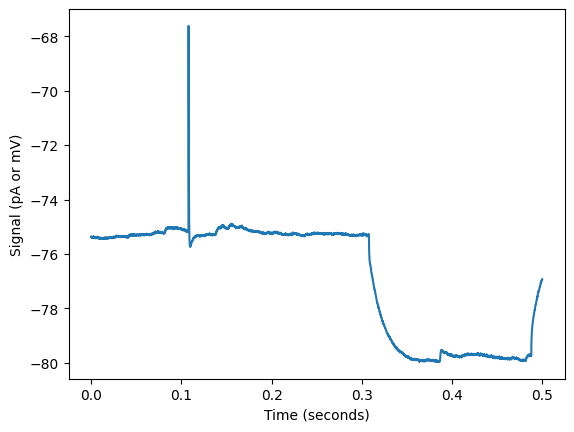

In [6]:
import pyabf

# Load the ABF file
abf = pyabf.ABF(data_path)

# Display some basic info about the file
print(f"File version: {abf.abfVersion}")
print(f"Signal length: {len(abf.sweepY)}")
print(f"Sampling rate: {abf.dataRate}")

# Plot the first sweep
import matplotlib.pyplot as plt
abf.setSweep(0)
plt.plot(abf.sweepX, abf.sweepY)
plt.xlabel("Time (seconds)")
plt.ylabel("Signal (pA or mV)")
plt.show()


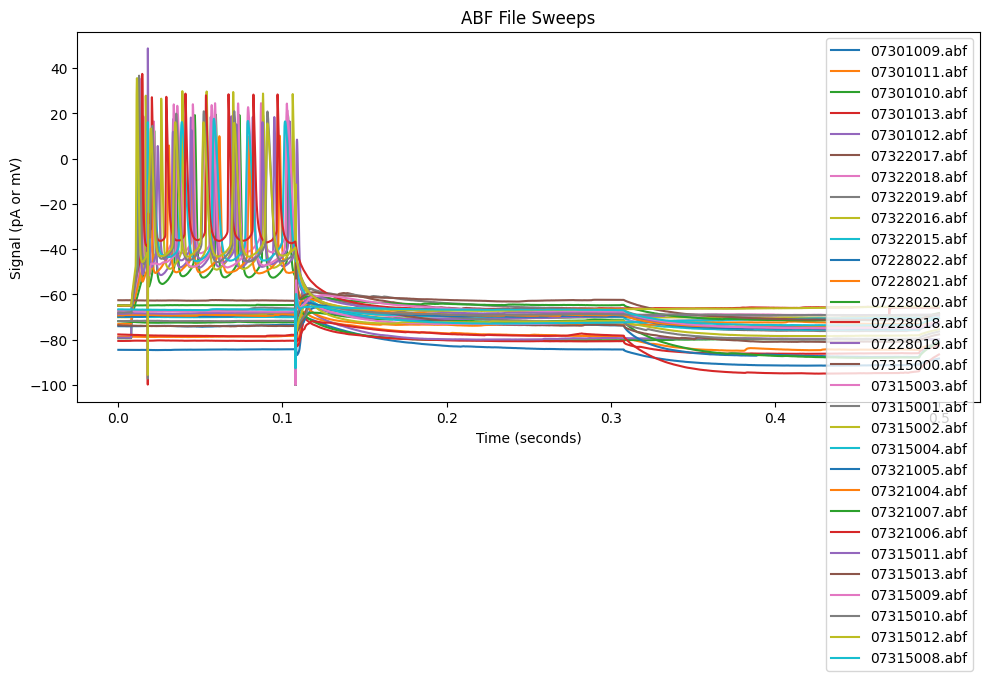

In [10]:
import os
import pyabf
import matplotlib.pyplot as plt

# Function to collect all .abf files in a directory structure
def collect_abf_files(root_dir):
    abf_files = []
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".abf"):
                abf_files.append(os.path.join(subdir, file))
    return abf_files

# Path to the root directory containing the data
root_dir = "data/data_ecs/Data_ECS_IC"

# Collect all .abf files in the directory
abf_files = collect_abf_files(root_dir)

abf_files = abf_files[:30]

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate over each .abf file and plot its data
for abf_file in abf_files:
    abf = pyabf.ABF(abf_file)
    
    # Plot the first sweep of each file (you can customize this as needed)
    abf.setSweep(0)
    plt.plot(abf.sweepX, abf.sweepY, label=os.path.basename(abf_file))

# Customize plot labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Signal (pA or mV)")
plt.title("ABF File Sweeps")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
# Convert ABF files to PWL files
import pyabf
import numpy as np

def abf_to_pwl(abf_file, pwl_file, scale_factor=1e-3, time_unit="ms"):
    """
    Convert ABF file data to LTSpice readable PWL format.
    
    Parameters:
    abf_file (str): Path to the .abf file.
    pwl_file (str): Path to save the generated PWL file.
    scale_factor (float): Scale factor to convert voltage to desired units (e.g., 1e-3 for millivolts).
    time_unit (str): Time units to be used in the PWL file (e.g., "s", "ms").
    """
    # Load the ABF file
    abf = pyabf.ABF(abf_file)
    
    # Open the PWL file for writing
    with open(pwl_file, 'w') as f:
        for sweep_index in range(abf.sweepCount):
            abf.setSweep(sweep_index)
            
            # Extract time (in seconds) and voltage (in pA or mV)
            time = abf.sweepX  # Time in seconds
            voltage = abf.sweepY  # Signal, typically in pA or mV
            
            # Convert time and voltage to the appropriate scale and write to file
            for t, v in zip(time, voltage):
                # Scale voltage as needed and convert time to ms if needed
                if time_unit == "ms":
                    t = t * 1e3  # Convert time to milliseconds
                elif time_unit == "s":
                    t = t  # Keep time in seconds
                
                # Apply the scale factor to voltage
                v_scaled = v * scale_factor

                # Write the time and voltage pair in LTSpice PWL format
                f.write(f"{t:.6g}{time_unit}\t{v_scaled:.6g}\n")
            break

    print(f"PWL file generated: {pwl_file}.")

# Example usage
abf_to_pwl("./data/data_ecs/Data_ECS_IC/IC13/07321006.abf", "sim/07301013.pwl.txt")


PWL file generated: sim/07301013.pwl.txt.
